## BREAST CANCER DETECTION

### DATA SOURCE
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Pycaret Module 

In [1]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/f5/4b/2002980b046ac396618dfc152d384b812a78182b776ca77fe0ae5f80deac/pycaret-3.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets>=7.6.5 from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
     -------------------------------------- 153.4/153.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for imbalanced-learn>=0.8.1 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-

## Import Modules 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pycaret.classification import *
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset

df = pd.read_csv(r"E:\PORTFOLIO\1. DATA ANALYTICS\5. BREAST CANCER DETECTION\DATA\data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# delete unnecessary columns

df = df.drop(columns=['id','Unnamed: 32'], axis=1)

In [8]:
# Statistical Information

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# datatype info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Exploratory Data 

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

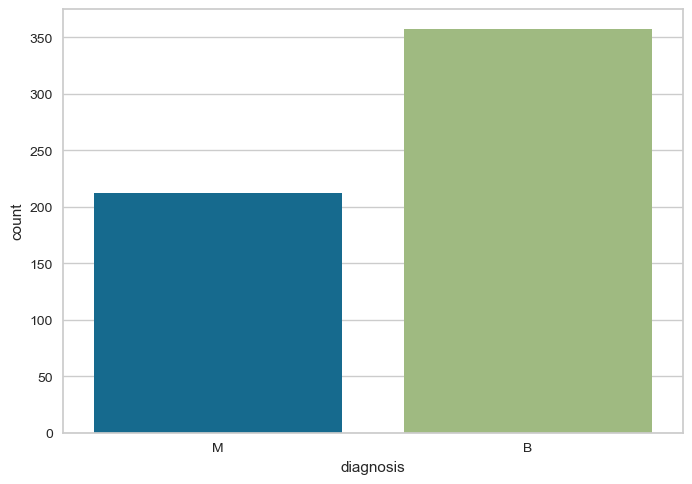

In [10]:
sns.countplot(df['diagnosis'])

M = Malignant
, B = Benign

In [11]:
df_temp = df.drop(columns=['diagnosis'], axis=1)

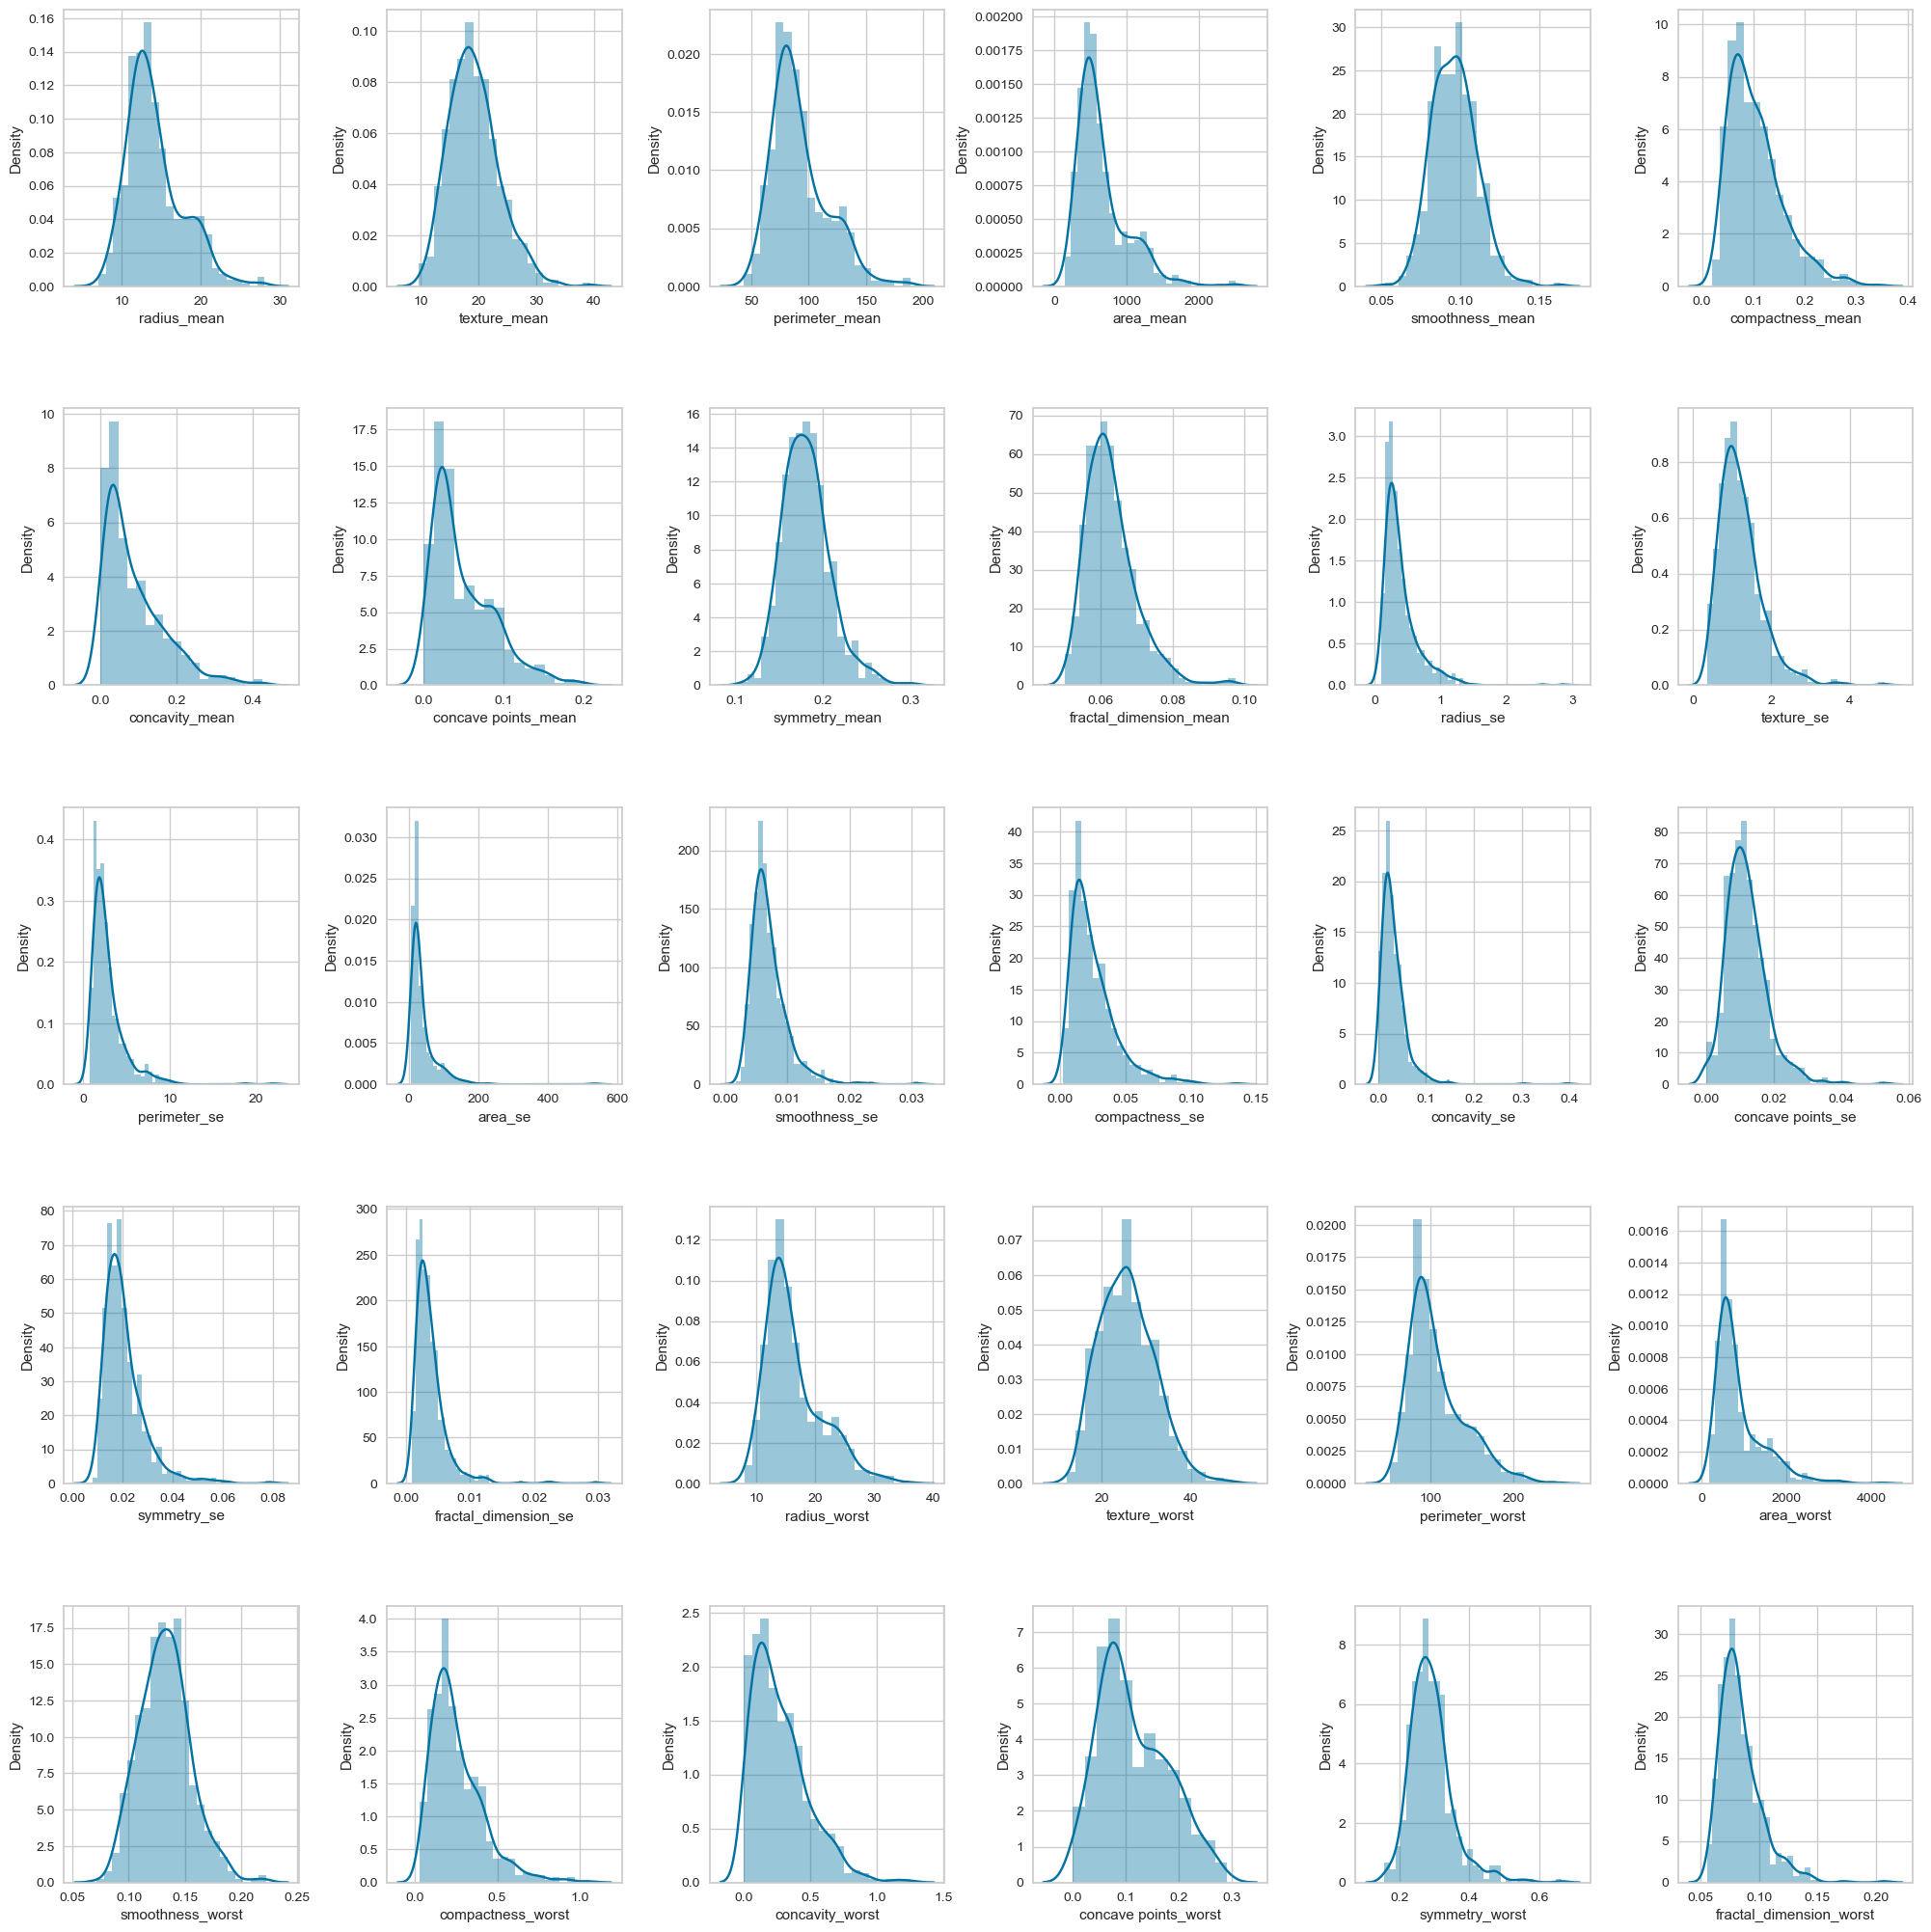

In [13]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df[col], ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

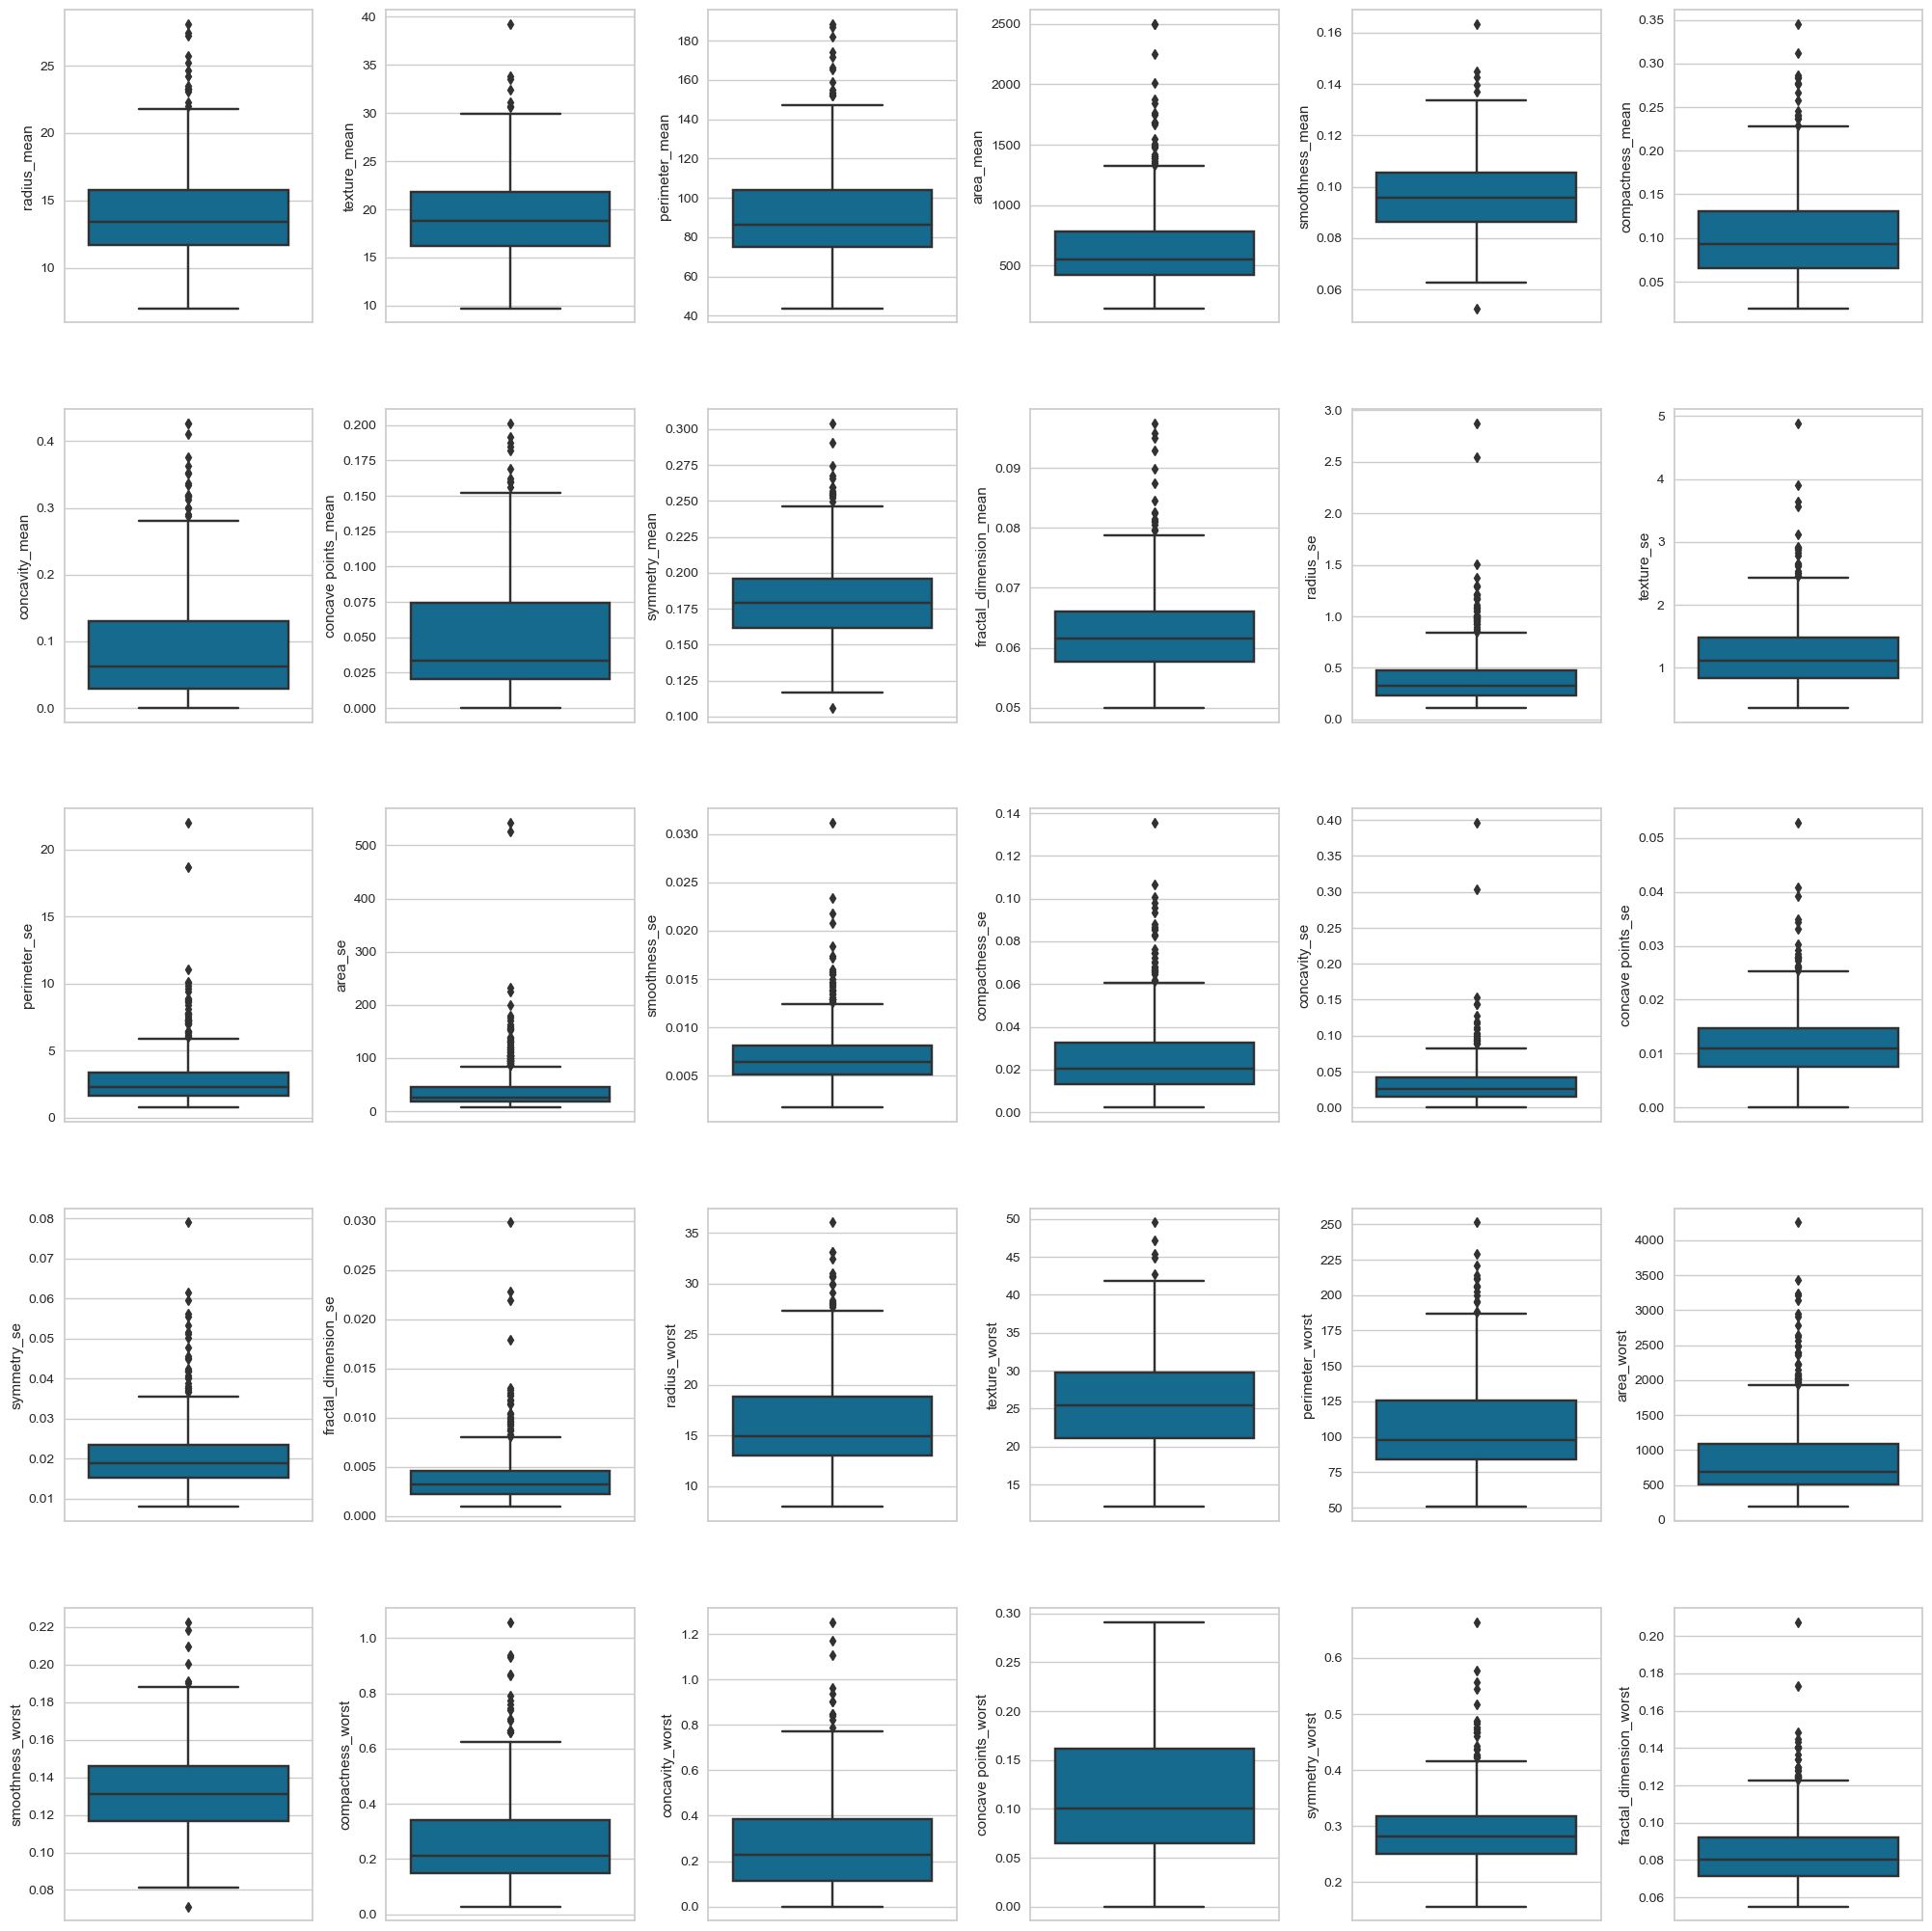

In [14]:
# create box plot

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Create and Train the Model 

In [22]:
# Setup the Data

clf = setup(df, target='diagnosis')

,Description,Value
0,Session id,262
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


In [23]:
# train and test the models

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9724,0.9933,0.9529,0.9750,0.9629,0.9410,0.9422,0.3550
gbc,Gradient Boosting Classifier,0.9649,0.9952,0.9529,0.9585,0.9540,0.9257,0.9280,0.5100
lightgbm,Light Gradient Boosting Machine,0.9624,0.9938,0.9595,0.9464,0.9512,0.9208,0.9230,0.3960
et,Extra Trees Classifier,0.9623,0.9953,0.9324,0.9670,0.9477,0.9183,0.9206,0.4650
lda,Linear Discriminant Analysis,0.9574,0.9906,0.8929,0.9923,0.9378,0.9059,0.9110,0.1680
rf,Random Forest Classifier,0.9548,0.9933,0.9390,0.9467,0.9401,0.9039,0.9074,0.4810
qda,Quadratic Discriminant Analysis,0.9547,0.9887,0.9390,0.9440,0.9386,0.9029,0.9063,0.1390
ridge,Ridge Classifier,0.9524,0.0000,0.8857,0.9866,0.9305,0.8948,0.9007,0.1330
lr,Logistic Regression,0.9447,0.9908,0.9195,0.9335,0.9237,0.8806,0.8838,1.4840
dt,Decision Tree Classifier,0.9422,0.9373,0.9186,0.9279,0.9203,0.8751,0.8785,0.1440


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=262)

In [28]:
# select the best model
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
2,0.9500,0.9787,0.8667,1.0000,0.9286,0.8904,0.8958
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9250,0.9787,0.9333,0.8750,0.9032,0.8421,0.8433
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
7,0.9250,0.9787,0.9333,0.8750,0.9032,0.8421,0.8433
8,0.9744,0.9971,0.9286,1.0000,0.9630,0.9434,0.9449


In [29]:
# hyperparameter tuning

best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9500,0.9813,0.8667,1.0000,0.9286,0.8904,0.8958
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9500,0.9840,0.9333,0.9333,0.9333,0.8933,0.8933
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9500,0.9893,0.9333,0.9333,0.9333,0.8933,0.8933
8,0.9487,0.9943,0.9286,0.9286,0.9286,0.8886,0.8886


Fitting 10 folds for each of 10 candidates, totalling 100 fits


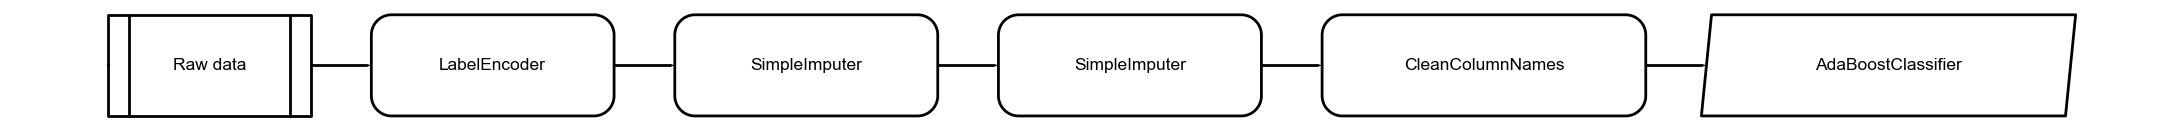

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [30]:
evaluate_model(best_model)

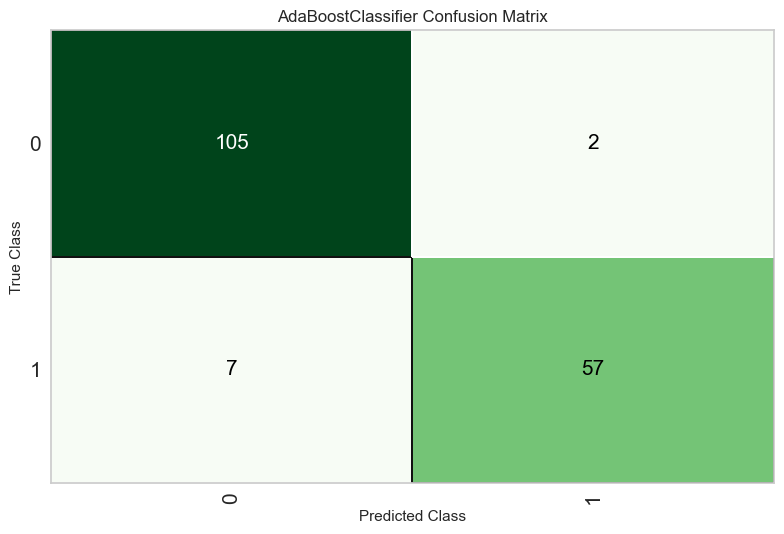

In [31]:
# plot the result

plot_model(estimator=best_model, plot='confusion_matrix')